<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>

<font size="5"> Telco Churn </font> <br><br>
Description
In the rapidly evolving telecommunications industry, understanding and mitigating customer churn has become a critical business concern. This data science project aims to analyze customer churn patterns using historical data and build predictive models to identify customers at risk of churning. By doing so, this project aims to provide actionable insights to Telco, enabling them to implement targeted retention strategies.<br><br>
<font size="5"> Goals </font>
<ul>
<li>Data Collection and Preprocessing: Gather and clean Telco customer data to create a comprehensive dataset suitable for analysis.</li>
<li>Exploratory Data Analysis: Perform exploratory analysis to identify trends, patterns, and potential correlations related to customer churn.</li>
<li>Feature Importance Determination: Employ machine learning techniques to assess the importance of various features in predicting churn, aiding in identifying critical factors.</li>
<li>Model Building and Evaluation: Develop predictive models for customer churn, compare their performance, and select the most effective one for accurate churn prediction.</li>
</ul>
</div>

<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'><font size="5"> Imports </font></div>

In [1]:
# Imports of required funcitons
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from prepare import telco_pipeline, telco_prep, telco_modeling
from visuals import plot_churn_distribution, plot_churn_by_internet_service, plot_churn_vs_payment_method, plot_churn_vs_tenure_histogram, plot_churn_vs_monthly_charges_histogram
from explore import chi2_internet_service, chi2_internet_service_type, chi2_payment_method, ttest_churn_vs_tenure, ttest_monthly_charges
from model import get_tree, get_forest, get_logreg, get_knn, get_forest_test

<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'><font size="5">Acquire</font>
<br>
<ul>
<li>Data acquired from Codeup servers.</li>
<li>It contained 7,043 rows and 20 columns before cleaning</li>
<li>Each row represents a customer of Telco.</li>
<li>Each column represents a feature of the customer's account.</li>
</ul>
<br>
<font size="5">Prepare</font> <br>
<br>

* Removed unnecessary columns associated with joining table IDs
* Checked for nulls in the data
    * Replaced new customer's total charges value from blank to 0
    * Replaced internet service type nulls with "No internet service"
* Checked that column data types were appropriate
    * Changed data type of total charges from object to float
* Encoded categorical variables to binary "dummy" variables
    * Removed columns that did not contain useful information (duplicate info)
* Renamed columns to promote readability
* Split data into train, validate and test, stratifying on 'churn'
* Outliers have not been removed for this iteration of the project


<br>
<font size="5">Dictionary</font><br>
<br>
</div>

| Feature| Description |
|:-------|:------------|
| Senior Citizen| Whether the customer is a senior citizen (0 for no, 1 for yes)|
| Tenure| Number of months the customer has been with the Telco|
| Monthly Charges| Monthly charges incurred by the customer|
| Total Charges| Total charges incurred by the customer over the entire period|
| Male| Gender of the customer (True for male, False for female)|
| Partner| Whether the customer has a partner (spouse) (True for yes, False for no)|
| Dependents| Whether the customer has dependents (True for yes, False for no)|
| Phone Service| Whether the customer has phone service (True for yes, False for no)|
| Multiple Lines| Whether the customer has multiple phone lines (True for yes, False for no)|
| Online Security| Whether the customer has online security service (True for yes, False for no)|
| Online Backup| Whether the customer has online backup service (True for yes, False for no)|
| Device Protection| Whether the customer has device protection service (True for yes, False for no)|
| Tech Support| Whether the customer has technical support service (True for yes, False for no)|
| Streaming TV| Whether the customer has streaming TV service (True for yes, False for no)|
| Streaming Movies| Whether the customer has streaming movie service (True for yes, False for no)|
| Paperless Billing| Whether the customer has opted for paperless billing (True for yes, False for no)|
| Churn| Whether the customer has churned (True for churned, False for not churned)|
| Contract Month| Whether the customer is on a month-to-month contract (True for yes, False for no)|
| Contract One Year| Whether the customer is on a one-year contract (True for yes, False for no)|
| Contract Two Year| Whether the customer is on a two-year contract (True for yes, False for no)|
| Internet DSL| Whether the customer uses DSL internet service (True for yes, False for no)|
| Internet Fiber Optic| Whether the customer uses fiber optic internet service (True for yes, False for no)|
| Payment Bank Transfer| Whether the customer pays through bank transfer (True for yes, False for no)|
| Payment Credit Card| Whether the customer pays through credit card (True for yes, False for no)|
| Payment Electronic Check| Whether the customer pays through electronic check (True for yes, False for no)|
| Payment Mailed Check| Whether the customer pays through mailed check (True for yes, False for no)|

<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'><font size="5">A brief look at the data</font></div>

In [2]:
# acquiring, preparing the data
# splitting data into train, validate, and test
df = telco_prep()

# Lets increase the max columns since we have over 20
pd.set_option('display.max_columns', None)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,contract_type,payment_method,payment_type,paperless_billing,monthly_charges,total_charges,churn
0,Female,No,Yes,Yes,9,Yes,No,Yes,DSL,No,No,No,No,No,No,Yes,One year,Mailed check,Manual,Yes,65.6,593.30,No
1,Male,No,No,No,9,Yes,Yes,Yes,DSL,No,No,No,No,No,No,No,Month-to-month,Mailed check,Manual,No,59.9,542.40,No
2,Male,No,No,No,4,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Electronic check,Manual,Yes,73.9,280.85,Yes
3,Male,Yes,Yes,No,13,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Electronic check,Manual,Yes,98.0,1237.85,Yes
4,Female,Yes,Yes,No,3,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,No,Month-to-month,Mailed check,Manual,Yes,83.9,267.40,Yes


<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 24px; box-sizing: border-box;'><font size="5">A summery of the data</font> </div>

In [3]:
# Print summary of data
print(df.describe())
print()
print(df.shape)

            tenure  monthly_charges  total_charges
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2279.734304
std      24.559481        30.090047    2266.794470
min       0.000000        18.250000       0.000000
25%       9.000000        35.500000     398.550000
50%      29.000000        70.350000    1394.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8684.800000

(7043, 23)


<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 24px; box-sizing: border-box;'>Explore</div>

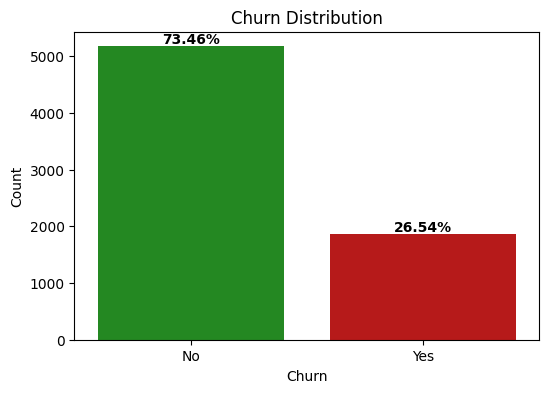

In [4]:
# Display overall churn chart
plot_churn_distribution(df)

<div style='background-color: #171738; padding-left: 40px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px; color: #DFF3E4; font-size: 18px; box-sizing: border-box;'>36% of our customers have churned.